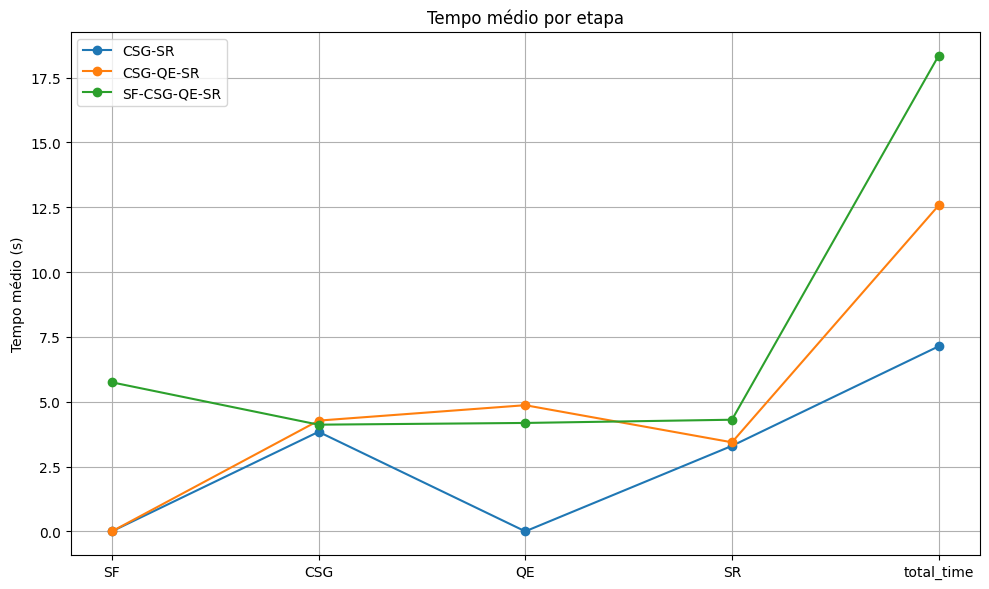

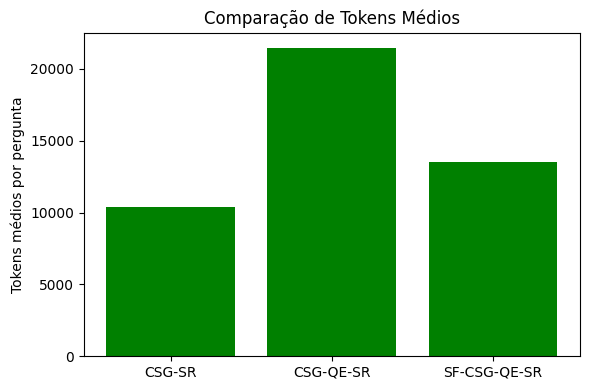

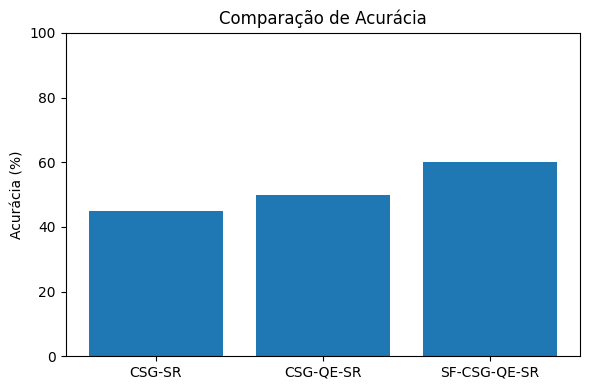

In [7]:
import json
import os
import matplotlib.pyplot as plt

def coletar_dados(caminho_arquivo):
    with open(caminho_arquivo, 'r', encoding='utf-8') as f:
        dados = json.load(f)

    etapas = ["SF", "CSG", "QE", "SR"]
    tempo_total = {etapa: 0.0 for etapa in etapas}
    tempo_total["total_time"] = 0.0
    total_tokens = 0
    total_perguntas = 0
    total_acertos = 0

    for item in dados:
        total_perguntas += 1

        # Tempo
        timing = item.get("timing", {})
        for etapa in etapas:
            tempo_total[etapa] += timing.get(etapa, 0.0)
        tempo_total["total_time"] += timing.get("total_time", 0.0)

        # Tokens
        total_tokens += item.get("total_usage", {}).get("total_tokens", 0)

        # Acurácia
        if item.get("results", {}).get("exec_res", 0) == 1:
            total_acertos += 1

    medias_tempo = {etapa: tempo_total[etapa] / total_perguntas for etapa in tempo_total}
    media_tokens = total_tokens / total_perguntas
    acuracia = (total_acertos / total_perguntas) * 100

    return medias_tempo, media_tokens, acuracia

# Caminhos e rótulos
arquivos = {
    "CSG-SR": "results/model_outputs_dev_CSG-SR_gpt-3.5-turbo/predictions.json",
    "CSG-QE-SR": "results/model_outputs_dev_CSG-QE-SR_gpt-3.5-turbo/predictions.json",
    "SF-CSG-QE-SR": "results/model_outputs_dev_SF-CSG-QE-SR_gpt-3.5-turbo/predictions.json"
}

# Coleta de dados
tempos_por_modelo = {}
tokens_por_modelo = {}
acuracias_por_modelo = {}

for nome_modelo, caminho in arquivos.items():
    medias_tempo, media_tokens, acuracia = coletar_dados(caminho)
    tempos_por_modelo[nome_modelo] = medias_tempo
    tokens_por_modelo[nome_modelo] = media_tokens
    acuracias_por_modelo[nome_modelo] = acuracia

# Gráfico 1: Tempo médio por etapa
etapas = ["SF", "CSG", "QE", "SR", "total_time"]
x = range(len(etapas))

plt.figure(figsize=(10, 6))
for nome_modelo in arquivos:
    y = [tempos_por_modelo[nome_modelo].get(etapa, 0.0) for etapa in etapas]
    plt.plot(x, y, marker='o', label=nome_modelo)
plt.xticks(x, etapas)
plt.ylabel("Tempo médio (s)")
plt.title("Tempo médio por etapa")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2: Média de tokens
plt.figure(figsize=(6, 4))
plt.bar(tokens_por_modelo.keys(), tokens_por_modelo.values(),color='g')
plt.ylabel("Tokens médios por pergunta")
plt.title("Comparação de Tokens Médios")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(acuracias_por_modelo.keys(), acuracias_por_modelo.values())
plt.ylabel("Acurácia (%)")
plt.title("Comparação de Acurácia")
plt.ylim(0, 100)  # Aqui você define o limite do eixo Y
plt.tight_layout()
plt.show()


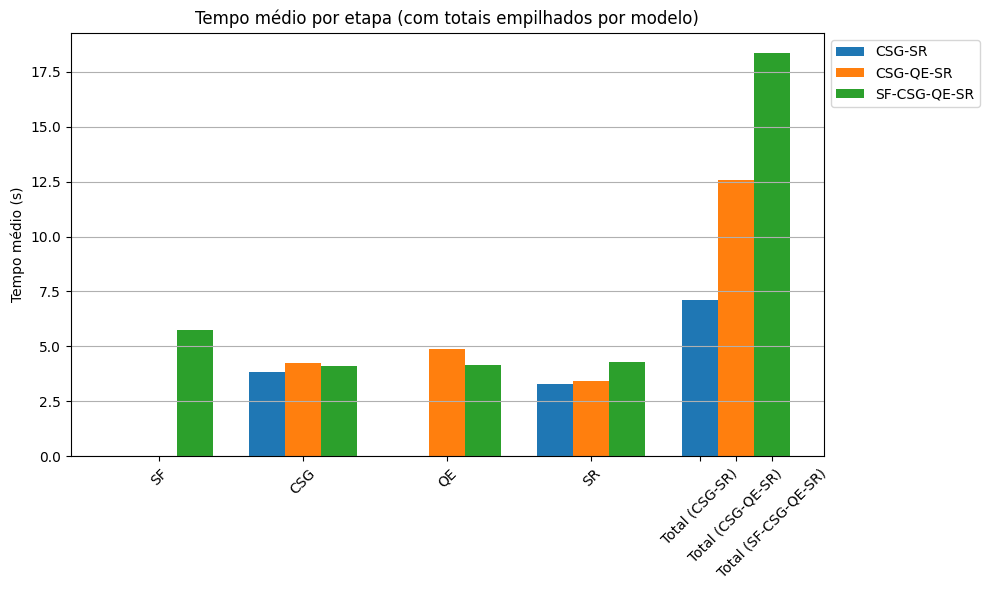

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Etapas e modelos
etapas_simples = ["SF", "CSG", "QE", "SR"]
modelos = list(arquivos.keys())
x = np.arange(len(etapas_simples))  # Posições X para etapas simples
largura = 0.25

# Cores fixas por modelo
cores_modelos = {
    modelos[0]: "#1f77b4",  # azul
    modelos[1]: "#ff7f0e",  # laranja
    modelos[2]: "#2ca02c",  # verde
}

plt.figure(figsize=(10, 6))

# Barras agrupadas por etapa simples
for i, nome_modelo in enumerate(modelos):
    y = [tempos_por_modelo[nome_modelo].get(etapa, 0.0) for etapa in etapas_simples]
    plt.bar(x + i * largura, y, width=largura, label=nome_modelo, color=cores_modelos[nome_modelo])

# Barras empilhadas (um stack por modelo)
x_empilhadas = [len(etapas_simples) + i * largura for i in range(len(modelos))]
bases = [0] * len(modelos)

# Usar tons mais escuros para empilhados, mas com a mesma cor base
for etapa in etapas_simples:
    alturas = [tempos_por_modelo[modelo].get(etapa, 0.0) for modelo in modelos]
    for j, modelo in enumerate(modelos):
        plt.bar(
            x_empilhadas[j], 
            alturas[j], 
            bottom=bases[j], 
            width=largura, 
            color=cores_modelos[modelo]
        )
        bases[j] += alturas[j]

# Eixos e labels
ticks_x = list(x + largura) + x_empilhadas
ticks_labels = etapas_simples + [f"Total ({modelo})" for modelo in modelos]

plt.xticks(ticks_x, ticks_labels, rotation=45)
plt.ylabel("Tempo médio (s)")
plt.title("Tempo médio por etapa (com totais empilhados por modelo)")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(axis='y')
plt.tight_layout()
plt.show()
